In [1]:
import numpy as np

# Our image processing tools
import skimage.filters
import skimage.io
import skimage.morphology
import skimage.exposure
import skimage.measure
import skimage.segmentation

# Plotting modules and settings.
import matplotlib.pyplot as plt
import seaborn as sns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f',
          '#bcbd22', '#17becf']
sns.set(style='whitegrid', palette=colors, rc={'axes.labelsize': 16})

# The following is specific Jupyter notebooks
%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

/Users/carlmblumenfeld/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


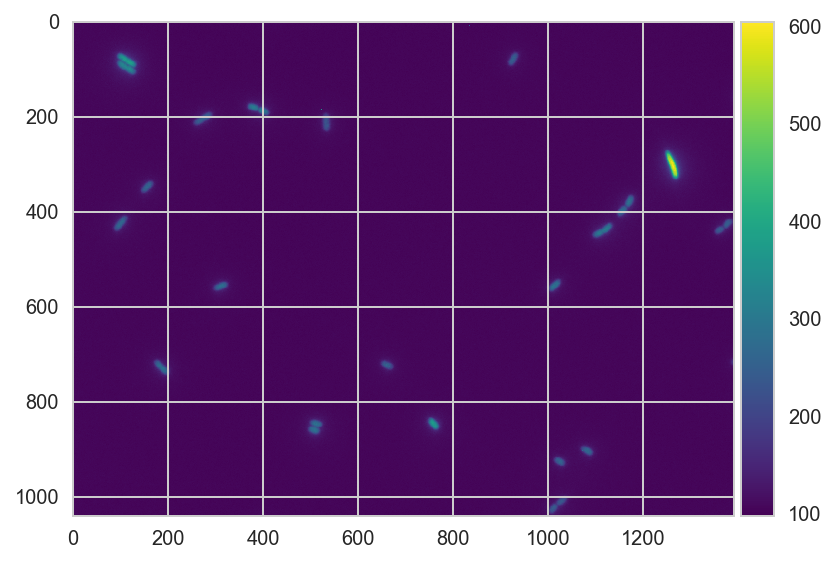

In [2]:
im_phase = skimage.io.imread('data/HG105_images/noLac_phase_0004.tif')
im_fl = skimage.io.imread('data/HG105_images/noLac_FITC_0004.tif')


skimage.io.imshow(im_fl)

In [3]:
selem = skimage.morphology.square(3)

#removing hot pixels

im_phase_filt = skimage.filters.median(im_phase, selem)
im_fl_filt = skimage.filters.median(im_fl, selem)


/Users/carlmblumenfeld/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


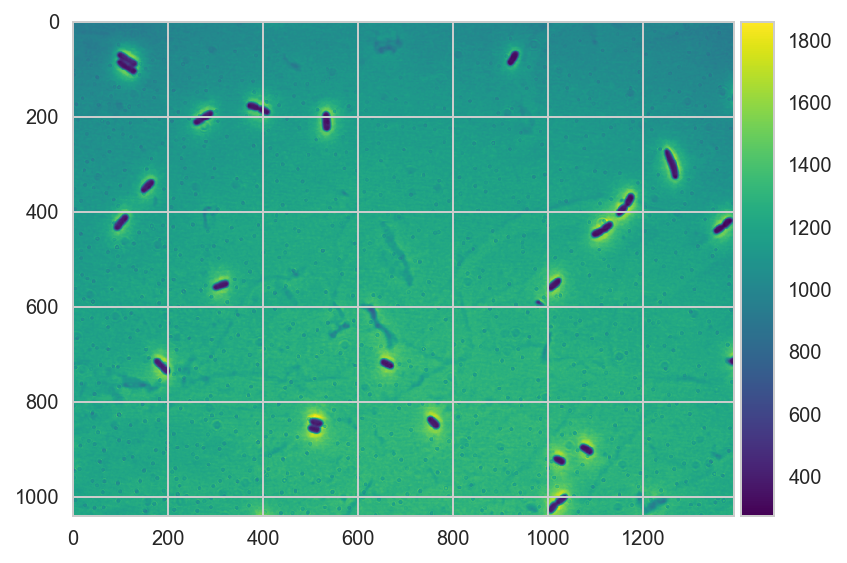

In [4]:
skimage.io.imshow(im_phase_filt)

/Users/carlmblumenfeld/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


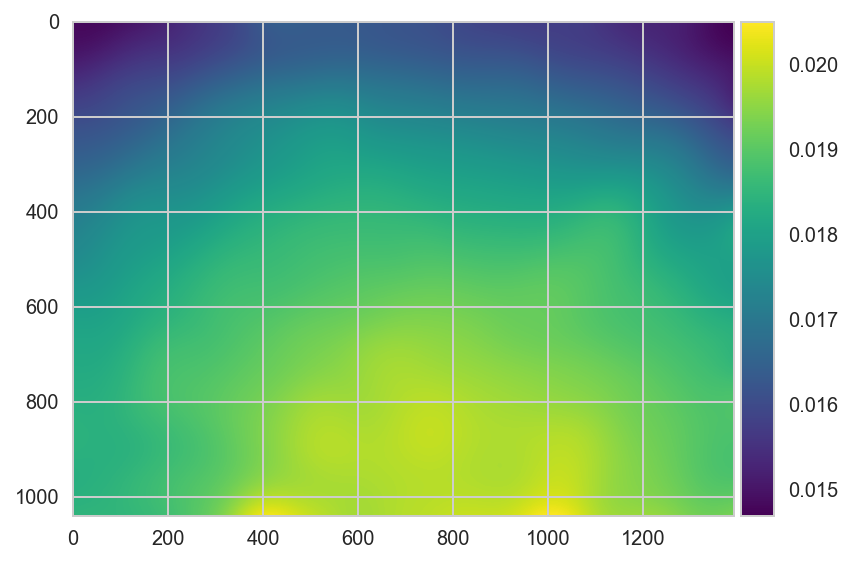

In [5]:
im_phase_bg = skimage.filters.gaussian(im_phase_filt, 50.0)

skimage.io.imshow(im_phase_bg)

In [9]:
im_phase_sub = skimage.img_as_float(im_phase_filt) - im_phase_bg

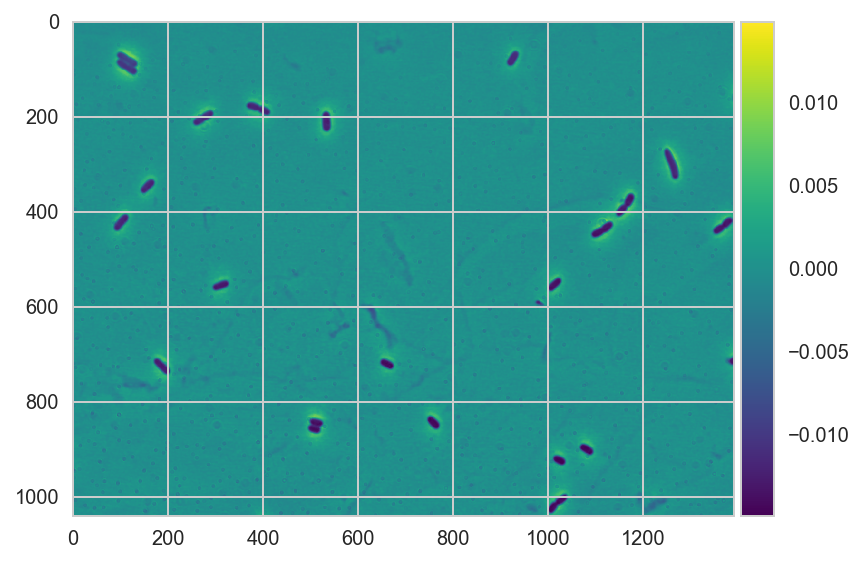

In [12]:
skimage.io.imshow(im_phase_sub, cmap=plt.cm.viridis)

/Users/carlmblumenfeld/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


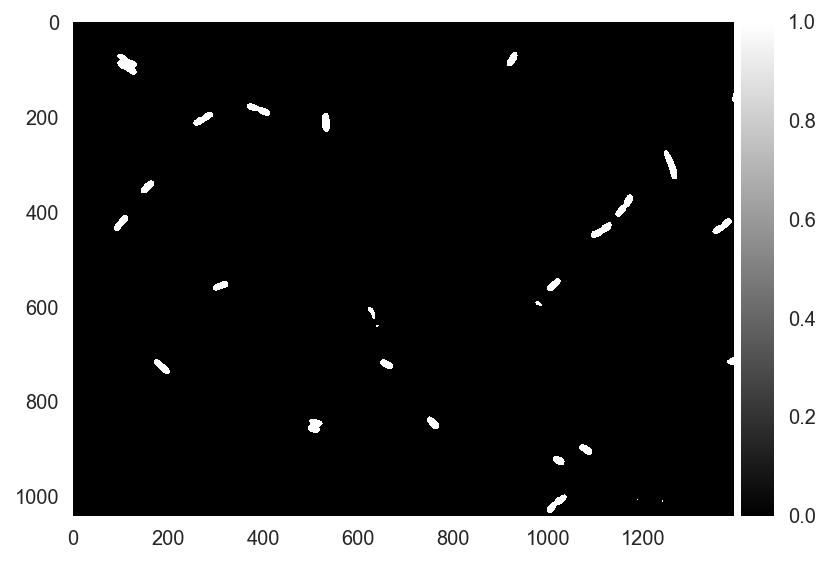

In [19]:
thresh_otsu = skimage.filters.threshold_otsu(im_phase_sub)

im_bw = im_phase_sub < thresh_otsu

with sns.axes_style('dark'):
    
    skimage.io.imshow(im_bw, cmap=plt.cm.gray)

In [27]:
im_bw = skimage.segmentation.clear_border(im_bw)



/Users/carlmblumenfeld/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


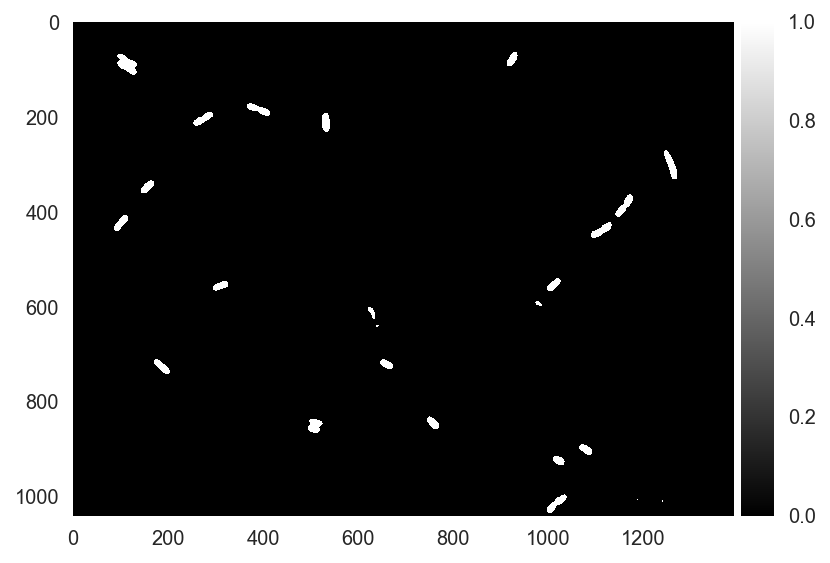

In [28]:
with sns.axes_style('dark'):
    
    skimage.io.imshow(im_bw, cmap=plt.cm.gray)

In [30]:
im_labeled = skimage.measure.label(im_bw, background=0)

/Users/carlmblumenfeld/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


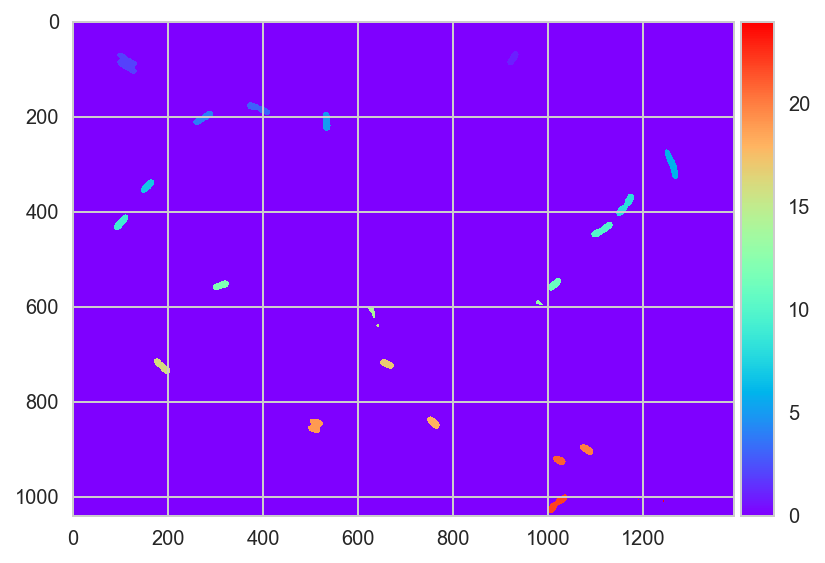

In [32]:
skimage.io.imshow(im_labeled, cmap=plt.cm.rainbow)

In [33]:
im_props = skimage.measure.regionprops(im_labeled, intensity_image=im_fl_filt)

In [37]:
prop = im_props[10].label

In [48]:
im_bw_filt = im_labeled > 0

cutoff = 200

for prop in im_props:
    if prop.area < cutoff:
        im_bw_filt[im_labeled==prop.label] = 0
        
im_labeled = skimage.measure.label(im_bw_filt)
im_props = skimage.measure.regionprops(im_labeled, intensity_image=im_fl_filt)
        

In [49]:
int_intensity = [prop.area * prop.mean_intensity for prop in im_props]

In [50]:
int_intensity

[85167.0,
 328888.0,
 153205.0,
 125405.0,
 110639.99999999999,
 367573.0,
 94001.0,
 164550.0,
 113119.0,
 160980.0,
 97293.0,
 95855.0,
 118286.0,
 77723.0,
 118638.0,
 155136.0,
 85448.0,
 75193.0,
 128359.99999999999]

/Users/carlmblumenfeld/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


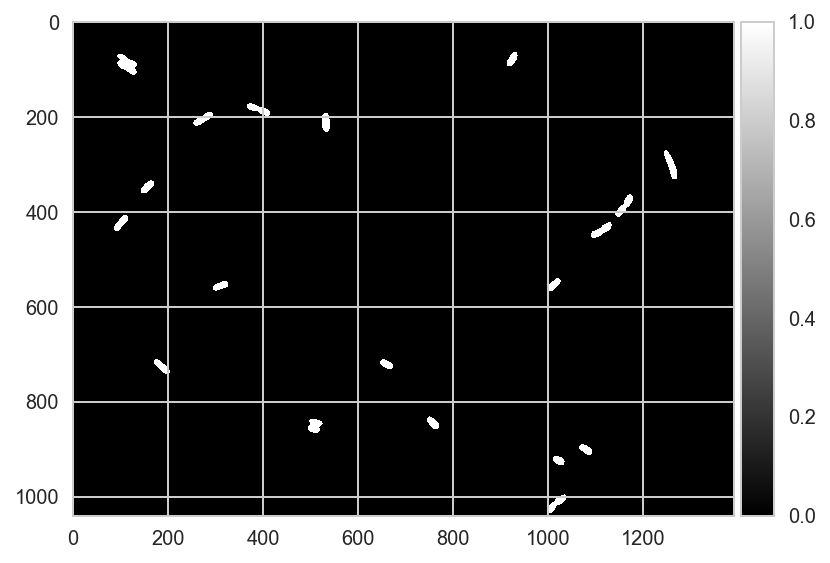

In [43]:
skimage.io.imshow(im_bw_filt, cmap=plt.cm.gray)

/Users/carlmblumenfeld/anaconda/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


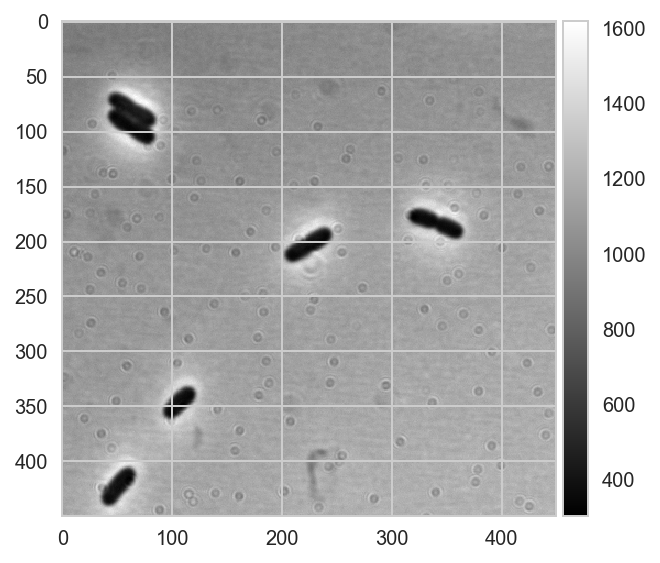

In [44]:
slc = np.s_[0:450, 50:500]

skimage.io.imshow(im_phase[slc], cmap=plt.cm.gray)

In [45]:
int_intensity = [prop.area * prop.mean_intensity for prop in im_props]

In [46]:
int_intensity

[85167.0,
 328888.0,
 153205.0,
 125405.0,
 110639.99999999999,
 367573.0,
 94001.0,
 164550.0,
 113119.0,
 160980.0,
 97293.0,
 95855.0,
 10237.0,
 19334.0,
 2648.0,
 118286.0,
 77723.0,
 118638.0,
 155136.0,
 85448.0,
 75193.0,
 128359.99999999999,
 210.0,
 944.0]